# Online Payment Fraud Detection using Machine Learning
With the evolution of technology, the vast trend of online payment is tremedous. Despite online payment being adverntagious ad beneficial to buyers and sellers due to ist ability to save time and cost, its associated with fraudulent risks/activities. This is the reason as to why Online Paymet Fraud Detection is very important. To do this, we will use classification algorithm to train a machine learning model to identify fraudulent and non-fraudulent payments.
## The dataset to be used has the following columns;
* Step: Its a unit of time where 1 step equals 1hr
* type: Type of transaction done
* amount: Total amount of transaction
* nameOrg: Account that starts the transaction
* oldbalanceOrg: Balance of the account of sender before the transaction
* newbalanceOrg: Balance of the account of sender after the transaction
* nameDest: account that recieves the transaction
* oldbalanceDest: Balance of the account of the reciever before the transaction
* newbalanceDest: Balance of the account of the reciever after the transaction
* isFraud: The target, whether fraud or not


In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
data = pd.read_csv('C:\\Users\\hp\\Desktop\\Projects\\onlinefraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Now lets investigate the data

In [7]:
# First we check missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### We have no missing values, now lest check for duplicates

In [8]:
data.loc[data.duplicated]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


# Data Visualization
## Here, we will figure out all columns and do a comparison. First, lets identify columns with different datatypes like category, interger and float.

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables:", len(object_cols))

Categorical Variables: 3


In [10]:
integer = (data.dtypes == 'int')
num_cols = list(integer[integer].index)
print("Integer Variables:", len(num_cols))

Integer Variables: 0


In [11]:
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float Variables:", len(fl_cols))

Float Variables: 5


<Axes: xlabel='type', ylabel='count'>

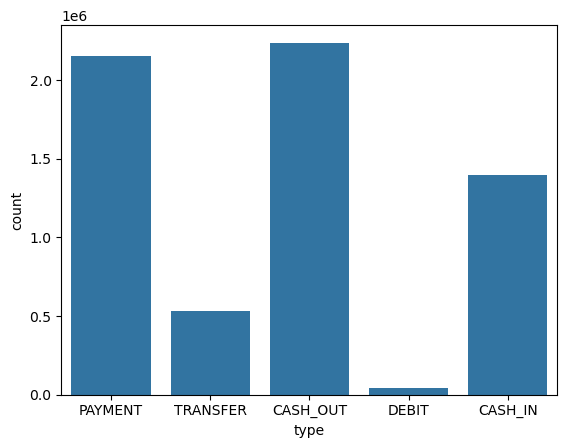

In [12]:
sns.countplot(x= 'type', data = data)

In [13]:
# distribution of data among both prediction values
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Text(0, 0.5, 'Count')

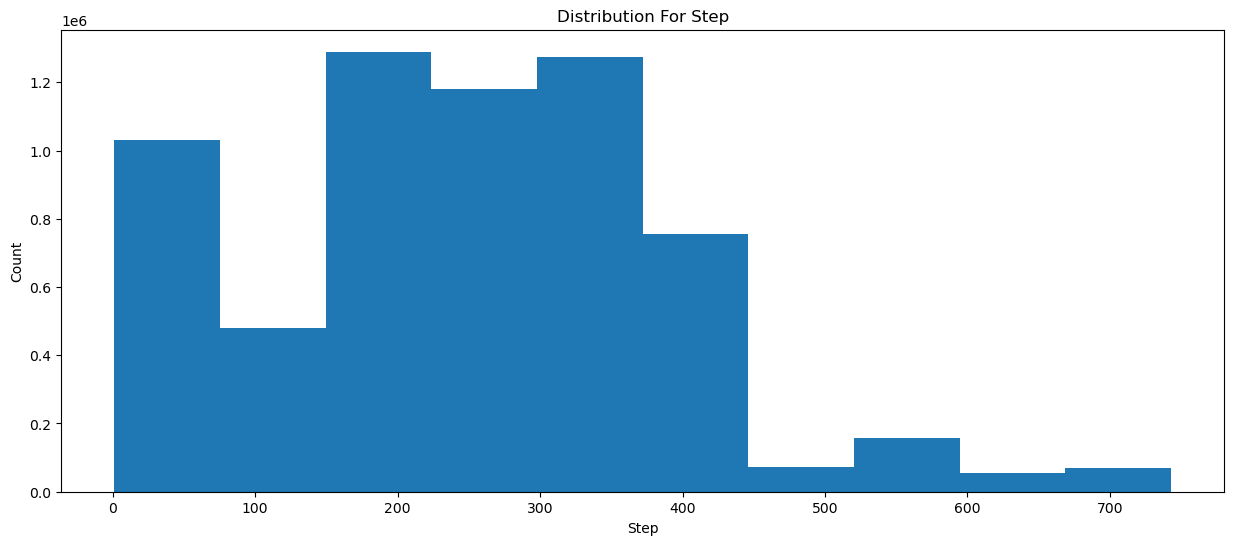

In [14]:
# lets plot a  histogram to see the distribution of step
plt.figure(figsize = (15, 6))
plt.hist(data['step'])
plt.title('Distribution For Step')
plt.xlabel('Step')
plt.ylabel('Count')
          

## The figure above shows that step seems seems to be right skewed which means that most of the data is distrbuted among 200 and 400. We need to check for correlation among different features using Heatmap

# Data Preprocesing
## The steps will include the following
* We will encode the "type" variable
* We shall drop columns that we no longer need them like "nameOrig" and "nameDest"
* At last, we shall split the data into training and testing dataset.

In [19]:
type_new = pd.get_dummies(data['type'], drop_first = True)
type_new = type_new.astype(int)
data_new = pd.concat([data, type_new], axis = 1)
data_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


In [20]:
## Now lets drop columns we no longer need
input_data = data_new.drop(columns = ['isFraud','type', 'nameOrig', 'nameDest'], axis = 1)
output_data = data_new['isFraud']
input_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [21]:
output_data.shape

(6362620,)

In [22]:
# We then split the data onto training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 0)

# Fitting the model
## Since the prediction is a classification problem, we will use the following models
1. Logistic Regression: It predicts the probability of a given data belonging to a particulat category
2. Random Forest Classifier: It creates a set of discission trees from a randomly selected subset of the training set. Then it collects the votes from different decision trees to decide the final pediction

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras

In [28]:
models = [LogisticRegression(), RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)]
for i in range(len(models)):
    models[i].fit(x_train, y_train)
    print(f'{models[i]} : ')
    train_preds = models[i].predict_proba(x_train)[:, 1]
    print('Training Accuracy: ', ras(y_train, train_preds))
    y_preds = models[i].predict_proba(x_test)[:, 1]
    print('Validation Accuracy: ', ras(y_test, y_preds))
    print()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy:  0.9044279883786848
Validation Accuracy:  0.8948994549152041

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy:  0.9999994551305416
Validation Accuracy:  0.9682360520787833



## Of the two models, Random Forest Classifier was the best-performed with an accuracy score of 99.99% , hence its the best model